Submission 1 - Belajar Pengembang Machine Learning Dicoding

Menggunakan dataset bbc-news-data yang diunduh pada Kaggle yang diunduh melalui link https://www.kaggle.com/hgultekin/bbcnewsarchive 

In [1]:
# Mengambil data melalui google drive
# Dengan melekukan autentikasi akun gmail
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
!ls '/content/drive/My Drive/Dataset Latihan Pengembang ML'

bbc-news-data.csv  citrus.csv  Iris.csv


In [3]:
import pandas as pd
df = pd.read_csv('/content/drive/My Drive/Dataset Latihan Pengembang ML/bbc-news-data.csv', sep='\t')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  2225 non-null   object
 1   filename  2225 non-null   object
 2   title     2225 non-null   object
 3   content   2225 non-null   object
dtypes: object(4)
memory usage: 69.7+ KB


In [4]:
df.head(10)

,category,filename,title,content
0,business,001.txt,Ad sales boost Time Warner profit,Quarterly profits at US media giant TimeWarne...
1,business,002.txt,Dollar gains on Greenspan speech,The dollar has hit its highest level against ...
2,business,003.txt,Yukos unit buyer faces loan claim,The owners of embattled Russian oil giant Yuk...
3,business,004.txt,High fuel prices hit BA's profits,British Airways has blamed high fuel prices f...
4,business,005.txt,Pernod takeover talk lifts Domecq,Shares in UK drinks and food firm Allied Dome...
5,business,006.txt,Japan narrowly escapes recession,Japan's economy teetered on the brink of a te...
6,business,007.txt,Jobs growth still slow in the US,The US created fewer jobs than expected in Ja...
7,business,008.txt,India calls for fair trade rules,"India, which attends the G7 meeting of seven ..."
8,business,009.txt,Ethiopia's crop production up 24%,Ethiopia produced 14.27 million tonnes of cro...
9,business,010.txt,Court rejects $280bn tobacco case,A US government claim accusing the country's ...


In [5]:
# Kolom filename tidak relevan sehingga dapat di drop saja

df_baru = df.drop(columns=['filename'])

In [6]:
df_baru.head(10)

,category,title,content
0,business,Ad sales boost Time Warner profit,Quarterly profits at US media giant TimeWarne...
1,business,Dollar gains on Greenspan speech,The dollar has hit its highest level against ...
2,business,Yukos unit buyer faces loan claim,The owners of embattled Russian oil giant Yuk...
3,business,High fuel prices hit BA's profits,British Airways has blamed high fuel prices f...
4,business,Pernod takeover talk lifts Domecq,Shares in UK drinks and food firm Allied Dome...
5,business,Japan narrowly escapes recession,Japan's economy teetered on the brink of a te...
6,business,Jobs growth still slow in the US,The US created fewer jobs than expected in Ja...
7,business,India calls for fair trade rules,"India, which attends the G7 meeting of seven ..."
8,business,Ethiopia's crop production up 24%,Ethiopia produced 14.27 million tonnes of cro...
9,business,Court rejects $280bn tobacco case,A US government claim accusing the country's ...


In [7]:
# Import library yang dibutuhkan untuk melakukan preprocessing dan
# pembuatan model machine learning

import nltk, os, re, string
from nltk.corpus import stopwords
from nltk.corpus import wordnet as wn
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [8]:
# Melakukan pengecilan untuk semua huruf yang ada pada data

df_baru.content = df_baru.content.apply(lambda x: x.lower())
df_baru.title = df_baru.title.apply(lambda x: x.lower())

In [9]:
# Fungsi membersihkan data

def bersih(data):
    return(data.translate(str.maketrans('','', string.punctuation)))
    df_baru.title = df_baru.title.apply(lambda x: bersih(x))
    df_baru.content = df_baru.content.apply(lambda x: kelompok(x))

In [10]:
# Fungsi pengelompokan kata yang sesuai

kelompokan = WordNetLemmatizer()
def kelompok(data):
    pos_dict = {'N': wn.NOUN, 'V': wn.VERB, 'J': wn.ADJ, 'R': wn.ADV}
    return(' '.join([kelompokan.lemmatize(w,pos_dict.get(t, wn.NOUN)) for w,t in nltk.pos_tag(data.split())]))
    df_baru.title = df_baru.title.apply(lambda x: kelompok(x))
    df_baru.content = df_baru.content.apply(lambda x: kelompok(x))

In [11]:
# Fungsi pengenalan angka pada data

def angka(data):
    return re.sub('[0-9]+','',data)
    df_baru['title'].apply(angka)
    df_baru['content'].apply(angka)

In [12]:
stop_kata = stopwords.words()
def stopkata(data):
    return(' '.join([w for w in data.split() if w not in stop_kata ]))
    df_baru.title = df_new.title.apply(lambda x: stopkata(x))
    df_baru.content = df_new.content.apply(lambda x: kelompok(x))

In [13]:
df_baru.head(10)

,category,title,content
0,business,ad sales boost time warner profit,quarterly profits at us media giant timewarne...
1,business,dollar gains on greenspan speech,the dollar has hit its highest level against ...
2,business,yukos unit buyer faces loan claim,the owners of embattled russian oil giant yuk...
3,business,high fuel prices hit ba's profits,british airways has blamed high fuel prices f...
4,business,pernod takeover talk lifts domecq,shares in uk drinks and food firm allied dome...
5,business,japan narrowly escapes recession,japan's economy teetered on the brink of a te...
6,business,jobs growth still slow in the us,the us created fewer jobs than expected in ja...
7,business,india calls for fair trade rules,"india, which attends the g7 meeting of seven ..."
8,business,ethiopia's crop production up 24%,ethiopia produced 14.27 million tonnes of cro...
9,business,court rejects $280bn tobacco case,a us government claim accusing the country's ...


In [14]:
# Penyesuaian kategori untuk multiclass

category = pd.get_dummies(df_baru.category)
df_baru = pd.concat([df_baru, category], axis=1)
df_baru = df_baru.drop(columns=['category'])

In [15]:
df_baru.head(10)

,title,content,business,entertainment,politics,sport,tech
0,ad sales boost time warner profit,quarterly profits at us media giant timewarne...,1,0,0,0,0
1,dollar gains on greenspan speech,the dollar has hit its highest level against ...,1,0,0,0,0
2,yukos unit buyer faces loan claim,the owners of embattled russian oil giant yuk...,1,0,0,0,0
3,high fuel prices hit ba's profits,british airways has blamed high fuel prices f...,1,0,0,0,0
4,pernod takeover talk lifts domecq,shares in uk drinks and food firm allied dome...,1,0,0,0,0
5,japan narrowly escapes recession,japan's economy teetered on the brink of a te...,1,0,0,0,0
6,jobs growth still slow in the us,the us created fewer jobs than expected in ja...,1,0,0,0,0
7,india calls for fair trade rules,"india, which attends the g7 meeting of seven ...",1,0,0,0,0
8,ethiopia's crop production up 24%,ethiopia produced 14.27 million tonnes of cro...,1,0,0,0,0
9,court rejects $280bn tobacco case,a us government claim accusing the country's ...,1,0,0,0,0


In [16]:
content = df_baru['title'].values + '' + df_baru['content'].values
label = df_baru[['business', 'entertainment', 'politics', 'sport', 'tech']].values

In [17]:
# Library untuk mengelola dan membuat model

import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping

In [18]:
# Split data latih dan data uji

content_latih, content_uji, label_latih, label_uji = train_test_split(content, label, test_size = 0.2)

In [19]:
tokenizer = Tokenizer(num_words=4000, oov_token='_')

tokenizer.fit_on_texts(content_latih)
tokenizer.fit_on_texts(content_uji)

In [20]:
sequence_latih = tokenizer.texts_to_sequences(content_latih)
sequence_uji = tokenizer.texts_to_sequences(content_uji)

In [21]:
padd_latih = pad_sequences(sequence_latih) 
padd_uji = pad_sequences(sequence_uji)

In [22]:
# Build model NLP

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=5000, output_dim=16),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')
])

In [23]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',    
              metrics=['accuracy'])

In [24]:
# Fungsi Callback untuk menghentikan training model pada 85%

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.8 and logs.get('val_accuracy')>0.85):
      self.model.stop_training = True
      print("\nThe accuracy of the training set and the validation set has reached > 85%!")
callbacks = myCallback()

In [25]:
num_epochs = 40
history = model.fit(padd_latih,
                    label_latih,
                    epochs=num_epochs,
                    validation_data = (padd_uji, label_uji),
                    verbose=2,
                    callbacks = [callbacks])

Epoch 1/40
56/56 - 214s - loss: 1.6039 - accuracy: 0.2315 - val_loss: 1.6011 - val_accuracy: 0.2022 - 214s/epoch - 4s/step
Epoch 2/40
56/56 - 216s - loss: 1.4734 - accuracy: 0.3607 - val_loss: 1.3268 - val_accuracy: 0.4719 - 216s/epoch - 4s/step
Epoch 3/40
56/56 - 219s - loss: 0.8785 - accuracy: 0.6000 - val_loss: 0.9774 - val_accuracy: 0.5573 - 219s/epoch - 4s/step
Epoch 4/40
56/56 - 214s - loss: 0.5658 - accuracy: 0.7090 - val_loss: 0.7604 - val_accuracy: 0.7213 - 214s/epoch - 4s/step
Epoch 5/40
56/56 - 221s - loss: 0.3468 - accuracy: 0.8753 - val_loss: 0.7570 - val_accuracy: 0.7506 - 221s/epoch - 4s/step
Epoch 6/40
56/56 - 231s - loss: 0.1396 - accuracy: 0.9562 - val_loss: 0.6865 - val_accuracy: 0.7820 - 231s/epoch - 4s/step
Epoch 7/40
56/56 - 249s - loss: 0.0736 - accuracy: 0.9730 - val_loss: 0.6667 - val_accuracy: 0.8180 - 249s/epoch - 4s/step
Epoch 8/40
56/56 - 242s - loss: 0.0446 - accuracy: 0.9865 - val_loss: 0.7274 - val_accuracy: 0.8360 - 242s/epoch - 4s/step
Epoch 9/40

The 

In [26]:
# Visualisasi Hasil Akurasi dan Loss Model ML

import matplotlib.pyplot as plt

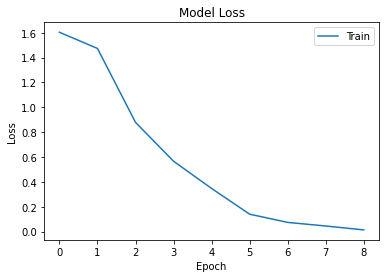

In [28]:
# Visualisasi Plot Loss Model

plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper right')
plt.show()

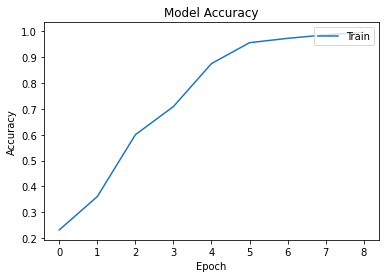

In [29]:
# Visualisasi Plot Accuracy Model

plt.plot(history.history['accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper right')
plt.show()